In [209]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from random import randint
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import (
    Input,
    Dense,
    BatchNormalization,
    Dropout,
    Activation,
    Flatten,
    MaxPool2D,
    Conv2D,
)
from PIL import Image
import cv2

In [113]:
tf.__version__

'2.10.0'

In [114]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [115]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

In [116]:
X_train.shape

(60000, 28, 28)

In [117]:
y_train.shape

(60000,)

In [118]:
X_test.shape

(10000, 28, 28)

In [119]:
y_test.shape

(10000,)

In [120]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

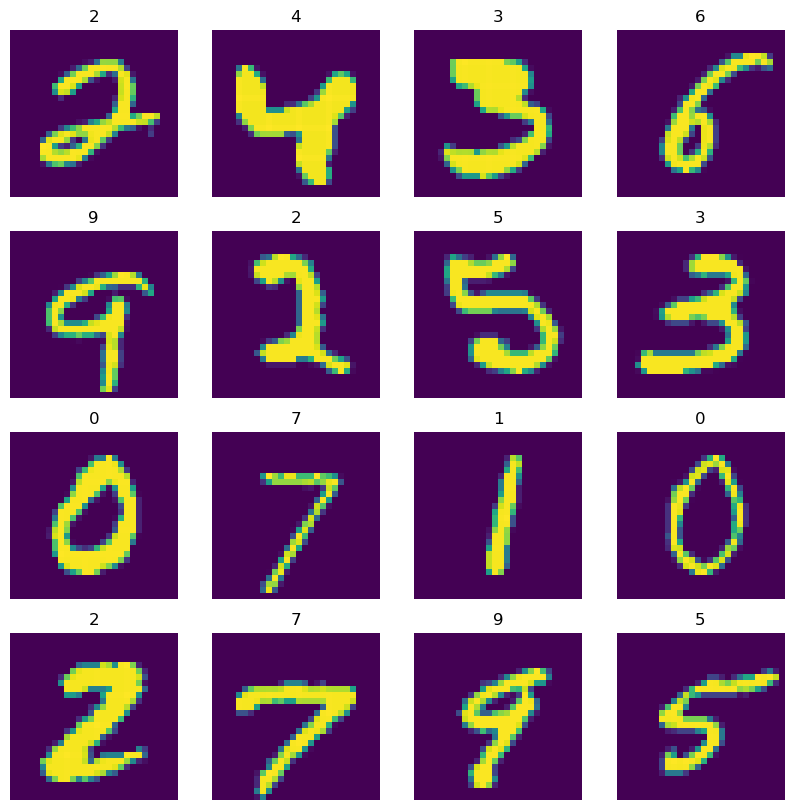

In [121]:
plt.figure(figsize=(10,10))
for i in range(16):
    index=randint(0,59999)
    plt.subplot(4,4,i+1)
    plt.axis('off')
    plt.title(y_train[index])
    plt.imshow(X_train[index])

In [122]:
model=tf.keras.Sequential()

In [123]:
model.add(Conv2D(filters=8,kernel_size=(3,3),input_shape=(28,28,1),padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),padding="same"))

model.add(Conv2D(filters=8,kernel_size=(3,3),padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),padding="same"))

model.add(Conv2D(filters=16,kernel_size=(3,3),padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),padding="same"))

model.add(Conv2D(filters=16,kernel_size=(3,3),padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),padding="same"))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),padding="same"))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dense(10,activation='softmax'))

In [124]:
model.compile('adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [125]:
with tf.device('/gpu:0'):
    hist=model.fit(X_train,y_train,batch_size=8,epochs=6,verbose=1)

Epoch 1/6
7500/7500 [==============================] - 46s 6ms/step - loss: 0.3882 - accuracy: 0.8792
Epoch 2/6
7500/7500 [==============================] - 44s 6ms/step - loss: 0.1519 - accuracy: 0.9588
Epoch 3/6
7500/7500 [==============================] - 47s 6ms/step - loss: 0.1212 - accuracy: 0.9670
Epoch 4/6
7500/7500 [==============================] - 47s 6ms/step - loss: 0.1026 - accuracy: 0.9724
Epoch 5/6
7500/7500 [==============================] - 44s 6ms/step - loss: 0.0885 - accuracy: 0.9756
Epoch 6/6
7500/7500 [==============================] - 44s 6ms/step - loss: 0.0824 - accuracy: 0.9784


In [126]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0452 - accuracy: 0.9871


[0.04522813484072685, 0.9871000051498413]

Text(0, 0.5, 'loss')

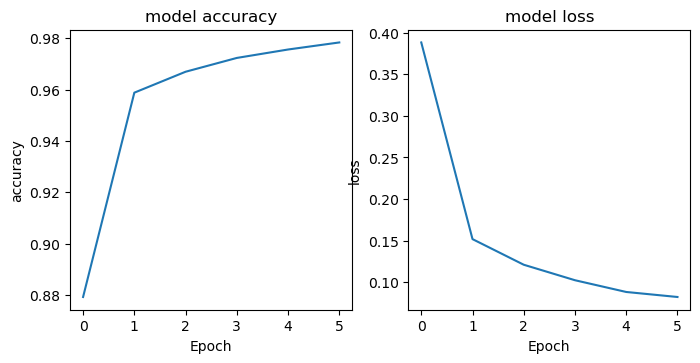

In [127]:
plt.figure(figsize=(8, 8))
plt.subplot(2,2,1)
plt.title("model accuracy")
plt.plot(hist.history["accuracy"])
plt.xlabel("Epoch")
plt.ylabel("accuracy")

plt.subplot(2,2,2)
plt.title("model loss")
plt.plot(hist.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("loss")

1/1 [==============================] - 0s 20ms/step


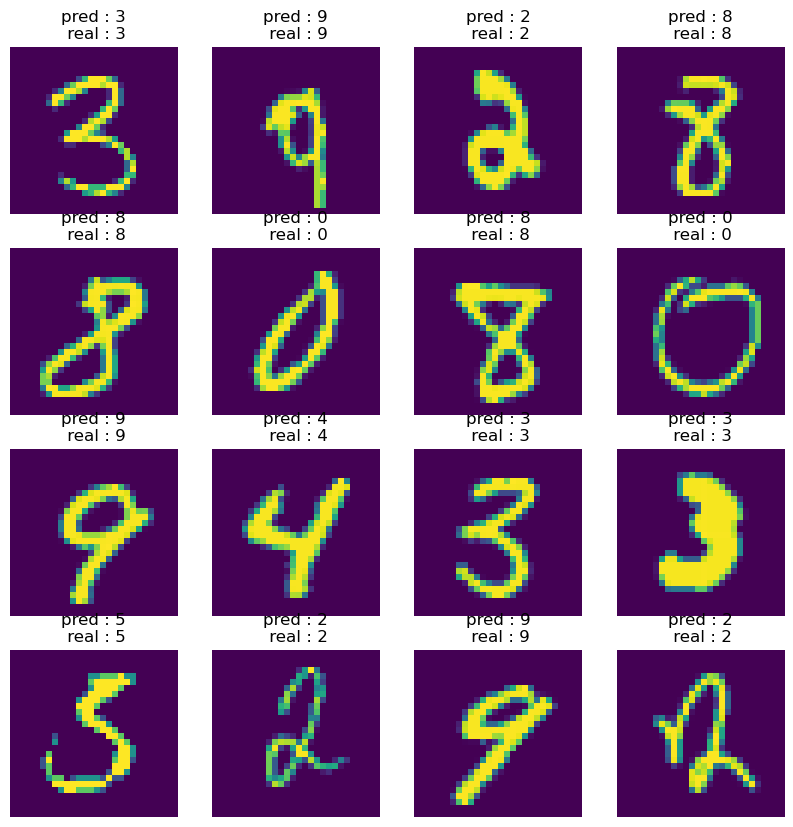

In [128]:
labels=list(set(y_test))
plt.figure(figsize=(10, 10))
for i in range(1, 17):
    index = randint(0, 9999)
    plt.subplot(4, 4, i)
    plt.imshow(X_test[index])
    plt.axis("off")
    plt.title(
        label="pred : "
        + str(labels[np.argmax(model.predict(tf.expand_dims(X_test[index], 0)))])
        + "\n real : "
        + str(labels[y_test[index]])
    )

In [129]:
#model=tf.keras.models.load_model("model.h5")

In [208]:
test = cv2.imread('2.png', cv2.IMREAD_GRAYSCALE)

test = cv2.resize(test, (28, 28), interpolation=cv2.INTER_LINEAR)

test = cv2.bitwise_not(test)

test=test.reshape(*(28,28,-1))

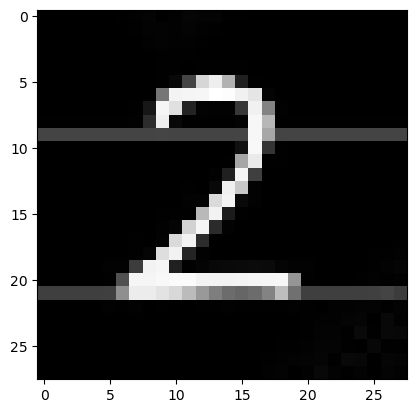

In [206]:
plt.imshow(test,cmap='gray')

In [207]:
np.argmax(model.predict(np.expand_dims(test,axis=0)))

1/1 [==============================] - 0s 24ms/step


2

In [135]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)

313/313 [==============================] - 1s 2ms/step


<Axes: >

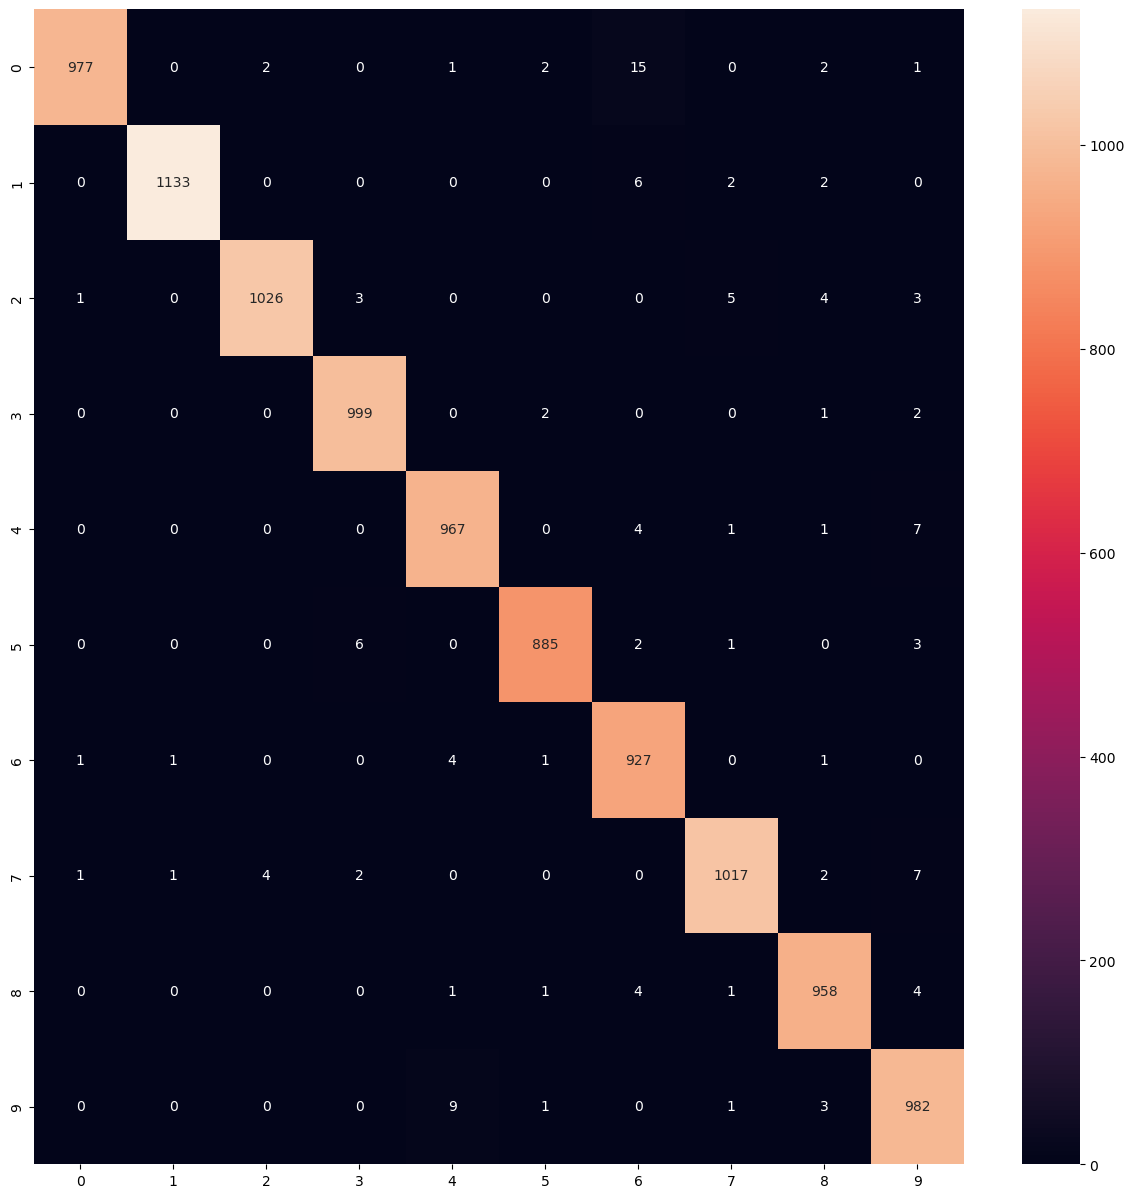

In [136]:
plt.figure(figsize=(15,15))
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt="d")

In [137]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.97      0.98       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [210]:
model.save("model.h5")